In [237]:
# The data-set aims to answer the following key questions:

    # Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?
    # Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?
    # How does Infant and Adult mortality rates affect life expectancy?
    # Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.
    # What is the impact of schooling on the lifespan of humans?
    # Does Life Expectancy have positive or negative relationship with drinking alcohol?
    # Do densely populated countries tend to have lower life expectancy?
    # What is the impact of Immunization coverage on life Expectancy?


# Import Library

In [315]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression, SelectKBest, f_regression
from sklearn.preprocessing import LabelEncoder

# Import Data

In [239]:
p_profile = 'https://raw.githubusercontent.com/notfakearcher/yanjun/main/02_data/Life_Expectancy_Data.csv'


In [240]:
life = pd.read_csv(p_profile, header = 14)
life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [241]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [242]:
# delete some rows which dont have any data in life expectancy
life = life.dropna(axis = 0, subset = ['Life expectancy '] )
life.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2928 non-null   int64  
 6   Alcohol                          2735 non-null   float64
 7   percentage expenditure           2928 non-null   float64
 8   Hepatitis B                      2375 non-null   float64
 9   Measles                          2928 non-null   int64  
 10   BMI                             2896 non-null   float64
 11  under-five deaths                2928 non-null   int64  
 12  Polio               

In [243]:
life1 = life.copy()
life1 = life1.dropna()
life1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

In [244]:
cond = life1.columns != 'Life expectancy '
life2 = life1.loc[:,cond]
life2

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# every country mean life expectancy boxplot

In [245]:
y = life1['Life expectancy ']
cond1 = life2.columns != 'Country'
cond2 = life2.columns != 'Status'
life2 = life2.loc[:, cond1&cond2]

# Visual

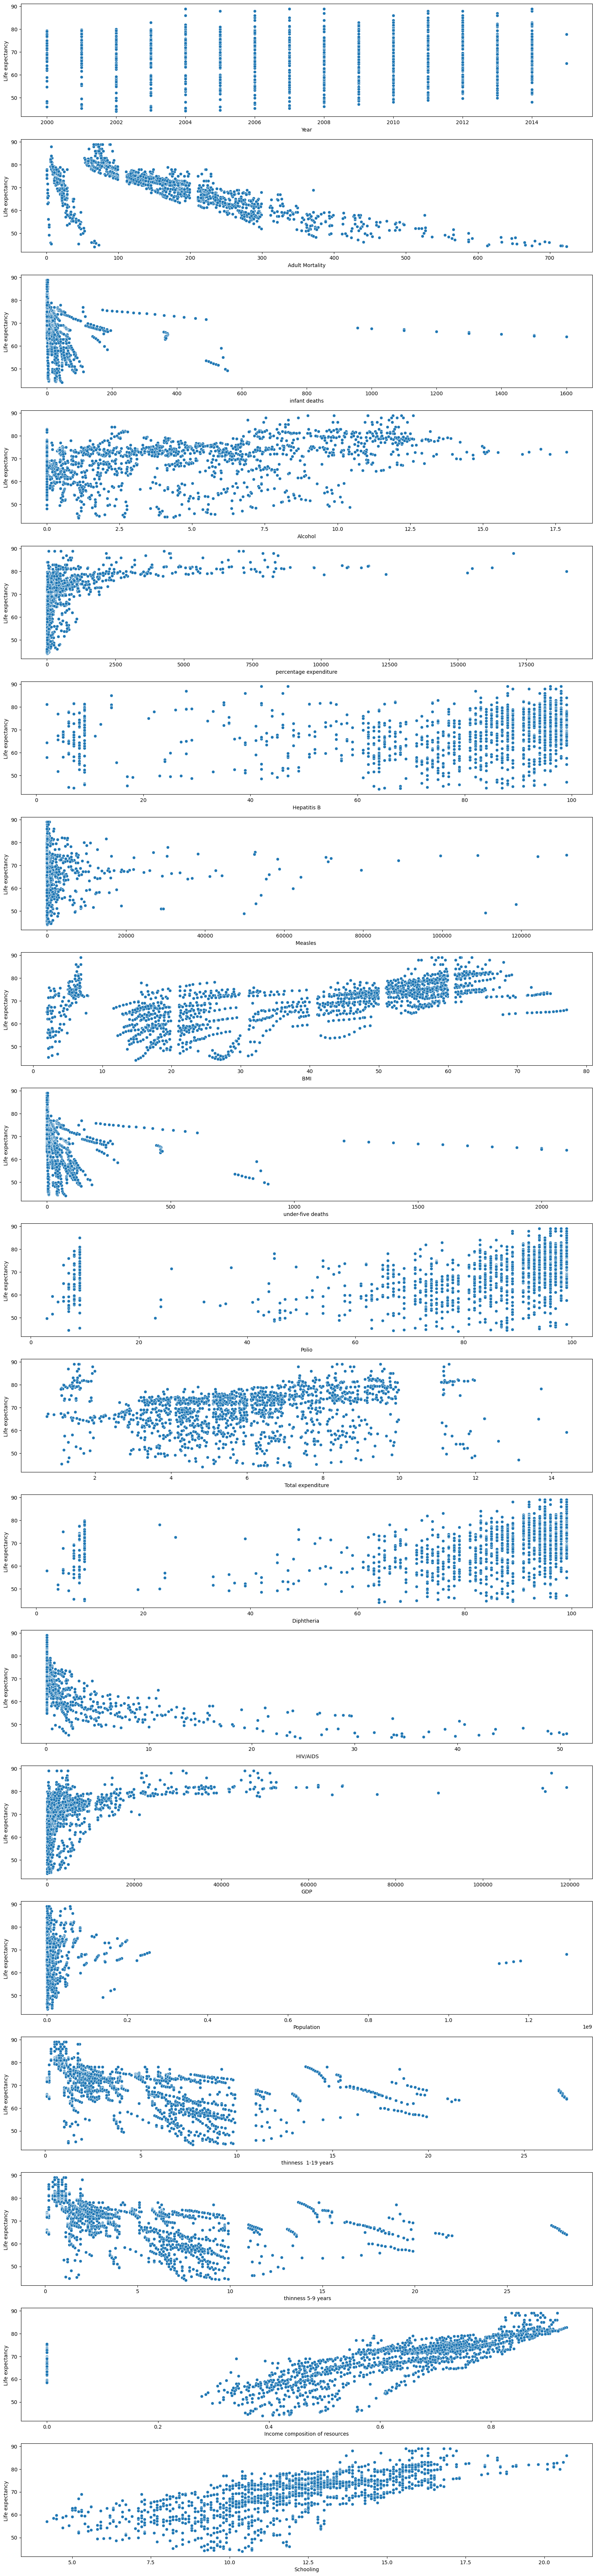

In [246]:
fig, ax = plt.subplots(19,1,figsize = (20,90))
ax = np.ravel(ax)
for i in range(len(life2.columns)):
  sns.scatterplot(x = life2.iloc[:, i], y = y, ax = ax[i])
plt.show()

# select features

In [253]:
life1.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [267]:
life0 = life1.copy()
life0.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [273]:
life0.select_dtypes("object")

,Country,Status
0,Afghanistan,Developing
1,Afghanistan,Developing
2,Afghanistan,Developing
3,Afghanistan,Developing
4,Afghanistan,Developing
...,...,...
2933,Zimbabwe,Developing
2934,Zimbabwe,Developing
2935,Zimbabwe,Developing
2936,Zimbabwe,Developing


In [282]:
life0.select_dtypes("object").columns

Index(['Country', 'Status'], dtype='object')

In [284]:
# convert categorical variables to numerical labels
le = LabelEncoder()
cols_to_convert = life0.select_dtypes("object").columns
life0[cols_to_convert] = life0.select_dtypes("object").apply(le.fit_transform)
life0.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [285]:
# get X_cols and y_col
y_col = "Life expectancy "
cond1 = life1.columns != y_col
X_cols = life1.columns[cond1]
X_cols

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [291]:
# separate X and y parts of dataframe
X = life0[X_cols]
y = life0[y_col]

In [328]:
# initialize SelectkBest model
# scoring_func = f_regression
scoring_func = mutual_info_regression
myfit = SelectKBest(scoring_func, k = 21)
myfit

SelectKBest(k=21,
            score_func=<function mutual_info_regression at 0x000002C15D8EC360>)

In [329]:
# fit model
temp = myfit.fit_transform(X, y)

In [330]:
# get feature importance
features = myfit.get_feature_names_out()
scores = myfit.scores_
feature_importance = pd.DataFrame({'features': features, 'scores': scores})
feature_importance = feature_importance.sort_values(by = 'scores', ascending = False)
feature_importance

,features,scores
3,Adult Mortality,1.268091
19,Income composition of resources,0.928269
18,thinness 5-9 years,0.827171
17,thinness 1-19 years,0.825404
0,Country,0.725467
20,Schooling,0.709048
9,BMI,0.677713
14,HIV/AIDS,0.513832
5,Alcohol,0.443195
10,under-five deaths,0.428153


In [331]:
# select top k features to include in model
k = 3
# feature_importance.iloc[:k,:]
X_col_selected = feature_importance.features[:k].values
X_col_selected

array(['Adult Mortality', 'Income composition of resources',
       ' thinness 5-9 years'], dtype=object)

In [247]:
# apply information gain
ig = mutual_info_regression(life2, y)
# create a dictionary of feature importance scores
feature_scores = {}
for i in range(len(life2.columns)):
  feature_scores[life2.columns[i]] = ig[i]
# sort in descending order accordig to their scores
sorted_features = sorted(feature_scores.items(), key =lambda x: x[1] , reverse = True)
# print the features by importance scores and the sorted features
for feature, score in sorted_features:
  print('Features:', feature, '|||||||Score:', score)


Features: Adult Mortality |||||||Score: 1.2633710044574813
Features: Income composition of resources |||||||Score: 0.9280496616221425
Features:  thinness 5-9 years |||||||Score: 0.8298261297910776
Features:  thinness  1-19 years |||||||Score: 0.8283141740725344
Features: Schooling |||||||Score: 0.7027151446240443
Features:  BMI  |||||||Score: 0.6774639049042679
Features:  HIV/AIDS |||||||Score: 0.5052579855780626
Features: Alcohol |||||||Score: 0.4441964066916122
Features: under-five deaths  |||||||Score: 0.43684018248032874
Features: infant deaths |||||||Score: 0.4313162797554586
Features: GDP |||||||Score: 0.4067284100671702
Features: percentage expenditure |||||||Score: 0.3615844348762791
Features: Total expenditure |||||||Score: 0.3435391024298653
Features: Polio |||||||Score: 0.20349252268333817
Features: Diphtheria  |||||||Score: 0.19330012602609958
Features: Hepatitis B |||||||Score: 0.1667883321819903
Features: Population |||||||Score: 0.1636383331211806
Features: Measles  ||||

In [248]:
sorted_features

[('Adult Mortality', 1.2633710044574813),
 ('Income composition of resources', 0.9280496616221425),
 (' thinness 5-9 years', 0.8298261297910776),
 (' thinness  1-19 years', 0.8283141740725344),
 ('Schooling', 0.7027151446240443),
 (' BMI ', 0.6774639049042679),
 (' HIV/AIDS', 0.5052579855780626),
 ('Alcohol', 0.4441964066916122),
 ('under-five deaths ', 0.43684018248032874),
 ('infant deaths', 0.4313162797554586),
 ('GDP', 0.4067284100671702),
 ('percentage expenditure', 0.3615844348762791),
 ('Total expenditure', 0.3435391024298653),
 ('Polio', 0.20349252268333817),
 ('Diphtheria ', 0.19330012602609958),
 ('Hepatitis B', 0.1667883321819903),
 ('Population', 0.1636383331211806),
 ('Measles ', 0.12519573043463028),
 ('Year', 0.09694918567263766)]

In [249]:
sorted_features = pd.DataFrame(sorted_features)

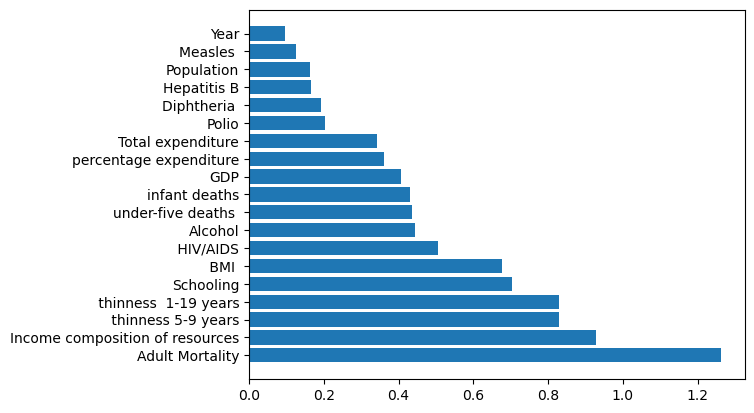

In [250]:
# plot a horizontal bar for all features scores
fig, ax = plt.subplots()
ax.barh(y = sorted_features[0], width = sorted_features[1])
plt.show()